# Análisis Exploratorio de Datos (EDA): 

## Objetivo
Este notebook contiene el análisis exploratorio completo del dataset, siguiendo una estructura organizada y metódica para entender los datos, limpiarlos y prepararlos para modelado.

## Contenido
1. Configuración Inicial y librearías
2. Limpieza
    - Carga de datos sucios
3. Análisis Exploratorio de los Datos
    - Carga de datos limpios
4. Análisis estadístico
5. Análisis Univariante
6. Análisis Bivariante

# 1. Configuración Inicial

Importamos las bibliotecas necesarias y configuramos el entorno de trabajo.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import os
import re


### Configuración del estilo visual

In [2]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [7]:
# Setting paths
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
mental_csv_path = os.path.join(data_dir, "df_completo.csv")
#----------------------------------------------------------------------------------------------------
# Creading dataframes
df_data = pd.read_csv(mental_csv_path)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Administrator\\Desktop\\proyecto_6\\data\\df_completo.csv'

In [4]:
df_clean_data = pd.read_csv("df_mental.csv")
df_clean_data.head(20)

,entity,code,year,schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,origen_dataset,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_eating_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,Prevalencia_Enfermedades_Mentales,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,Prevalencia_Enfermedades_Mentales,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,Prevalencia_Enfermedades_Mentales,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,Prevalencia_Enfermedades_Mentales,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,Prevalencia_Enfermedades_Mentales,891.39160,136.18323,146.58481,23.189074,436.76800
5,Afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507,Prevalencia_Enfermedades_Mentales,891.21344,135.65398,146.63217,22.503244,436.69098
6,Afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269,Prevalencia_Enfermedades_Mentales,891.92096,135.16324,146.67957,21.827526,436.52713
7,Afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531,Prevalencia_Enfermedades_Mentales,893.02045,134.20360,146.54947,21.124723,436.42557
8,Afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050,Prevalencia_Enfermedades_Mentales,894.73680,133.56137,146.69704,20.412657,436.77020
9,Afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723,Prevalencia_Enfermedades_Mentales,896.13806,132.82457,146.76817,19.931143,437.12753


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 14 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   entity                                                                             7110 non-null   object 
 1   code                                                                               7110 non-null   object 
 2   year                                                                               7110 non-null   int64  
 3   schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized  6420 non-null   float64
 4   depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized     6420 non-null   float64
 5   anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized        6420 non-null   float

In [6]:
df_clean_data.describe()

,year,schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_schizophrenia,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_bipolar_disorder,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_eating_disorders,dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_anxiety_disorders
count,7110.00000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.50000,0.266604,3.767036,4.101840,0.636968,0.195664,652.215475,171.090876,137.930619,42.392972,392.942475
std,8.65605,0.039383,0.925286,1.050543,0.233391,0.138380,183.643326,26.234514,51.197175,29.394380,100.820728
min,1990.00000,0.188416,1.522333,1.879996,0.181667,0.044780,243.097840,119.913380,39.438133,9.671199,180.049640
25%,1997.00000,0.242267,3.080036,3.425846,0.520872,0.096416,506.857413,155.950035,112.140244,20.837689,327.652407
50%,2004.50000,0.273477,3.636772,3.939547,0.579331,0.144150,640.099150,175.115100,124.228445,31.430651,376.317940
75%,2012.00000,0.286575,4.366252,4.564164,0.844406,0.251167,765.842910,183.999005,184.438120,55.850353,438.437842
max,2019.00000,0.462045,7.645899,8.624634,1.506730,1.031688,1427.423600,291.100100,325.152800,218.704390,814.302300


## Analisis exploratorio de datos

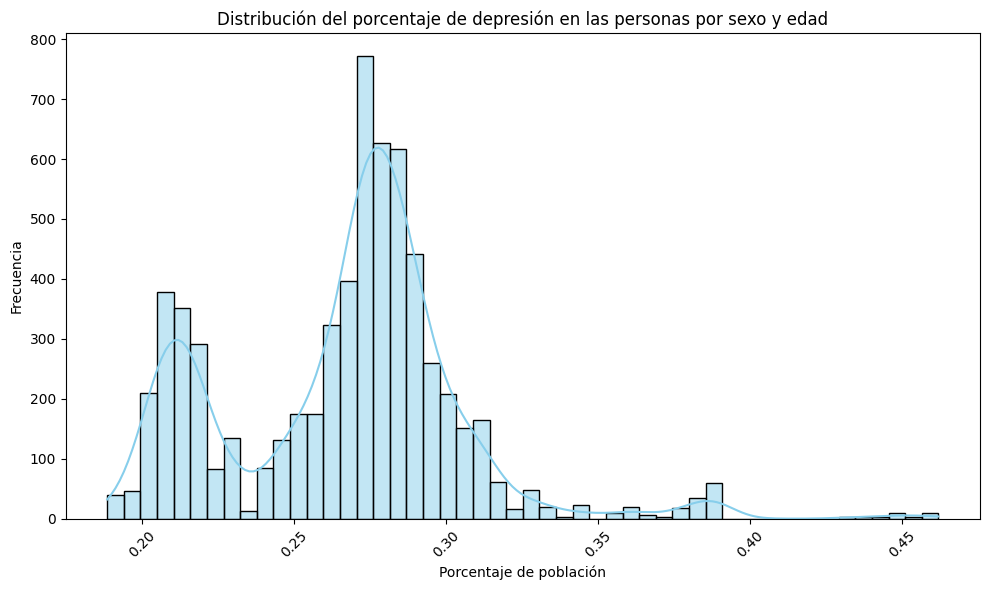

In [7]:
df_data = pd.read_csv("df_mental.csv")  

# 2. Preprocesamiento: convierte la columna a numérica si es necesario
df_clean_data = df_data.copy()
col_name = 'schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'
df_clean_data[col_name] = pd.to_numeric(df_clean_data[col_name], errors='coerce')

# 3. Genera el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_data[col_name], bins=50, kde=True, color='skyblue')
plt.title('Distribución del porcentaje de depresión en las personas por sexo y edad')
plt.xlabel('Porcentaje de población')
plt.ylabel('Frecuencia')

# Solo si los valores son numéricos muy grandes o pequeños:
# plt.ticklabel_format(axis='x', style='plain')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


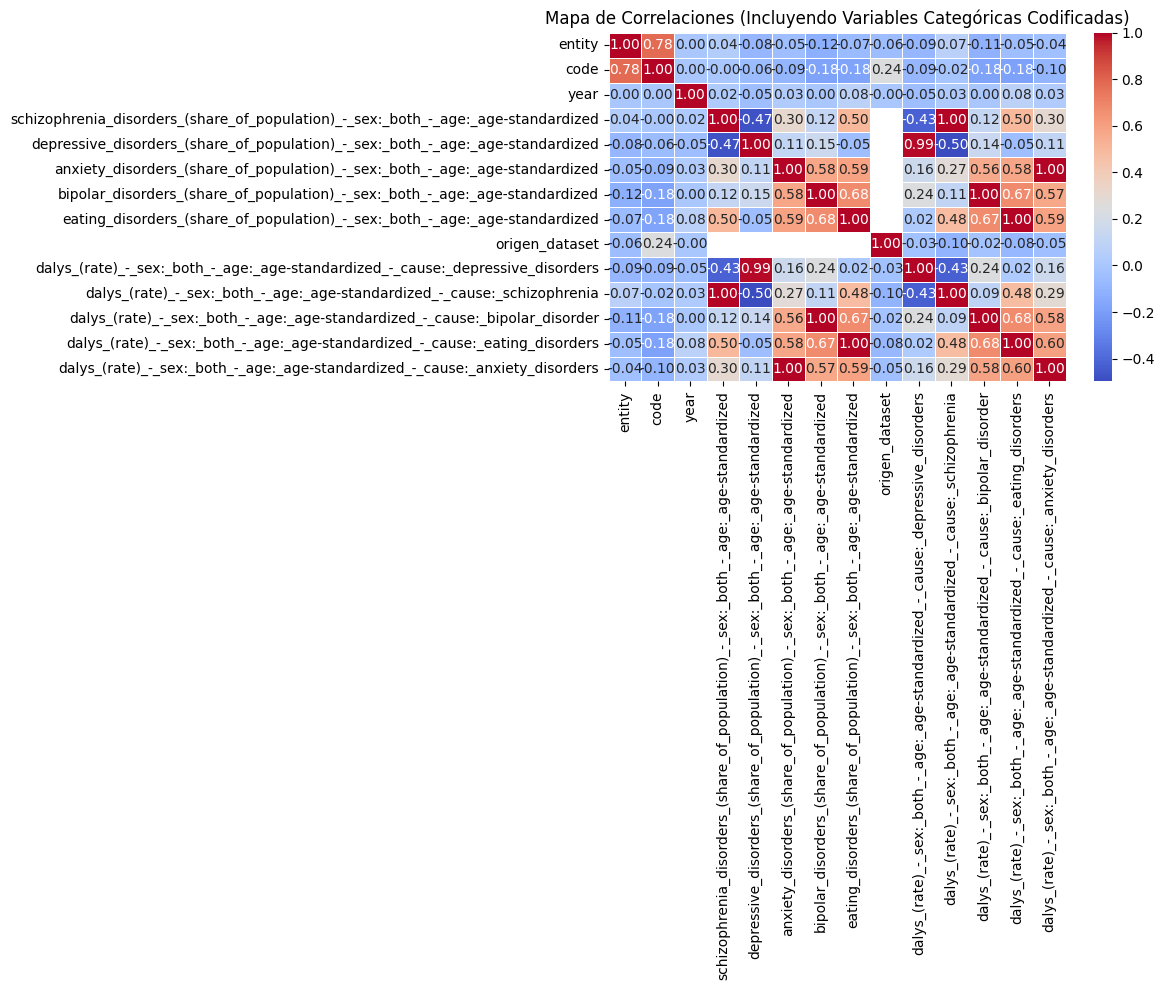

In [8]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_clean_data.copy()

# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlaciones (Incluyendo Variables Categóricas Codificadas)')
plt.tight_layout()
plt.show()

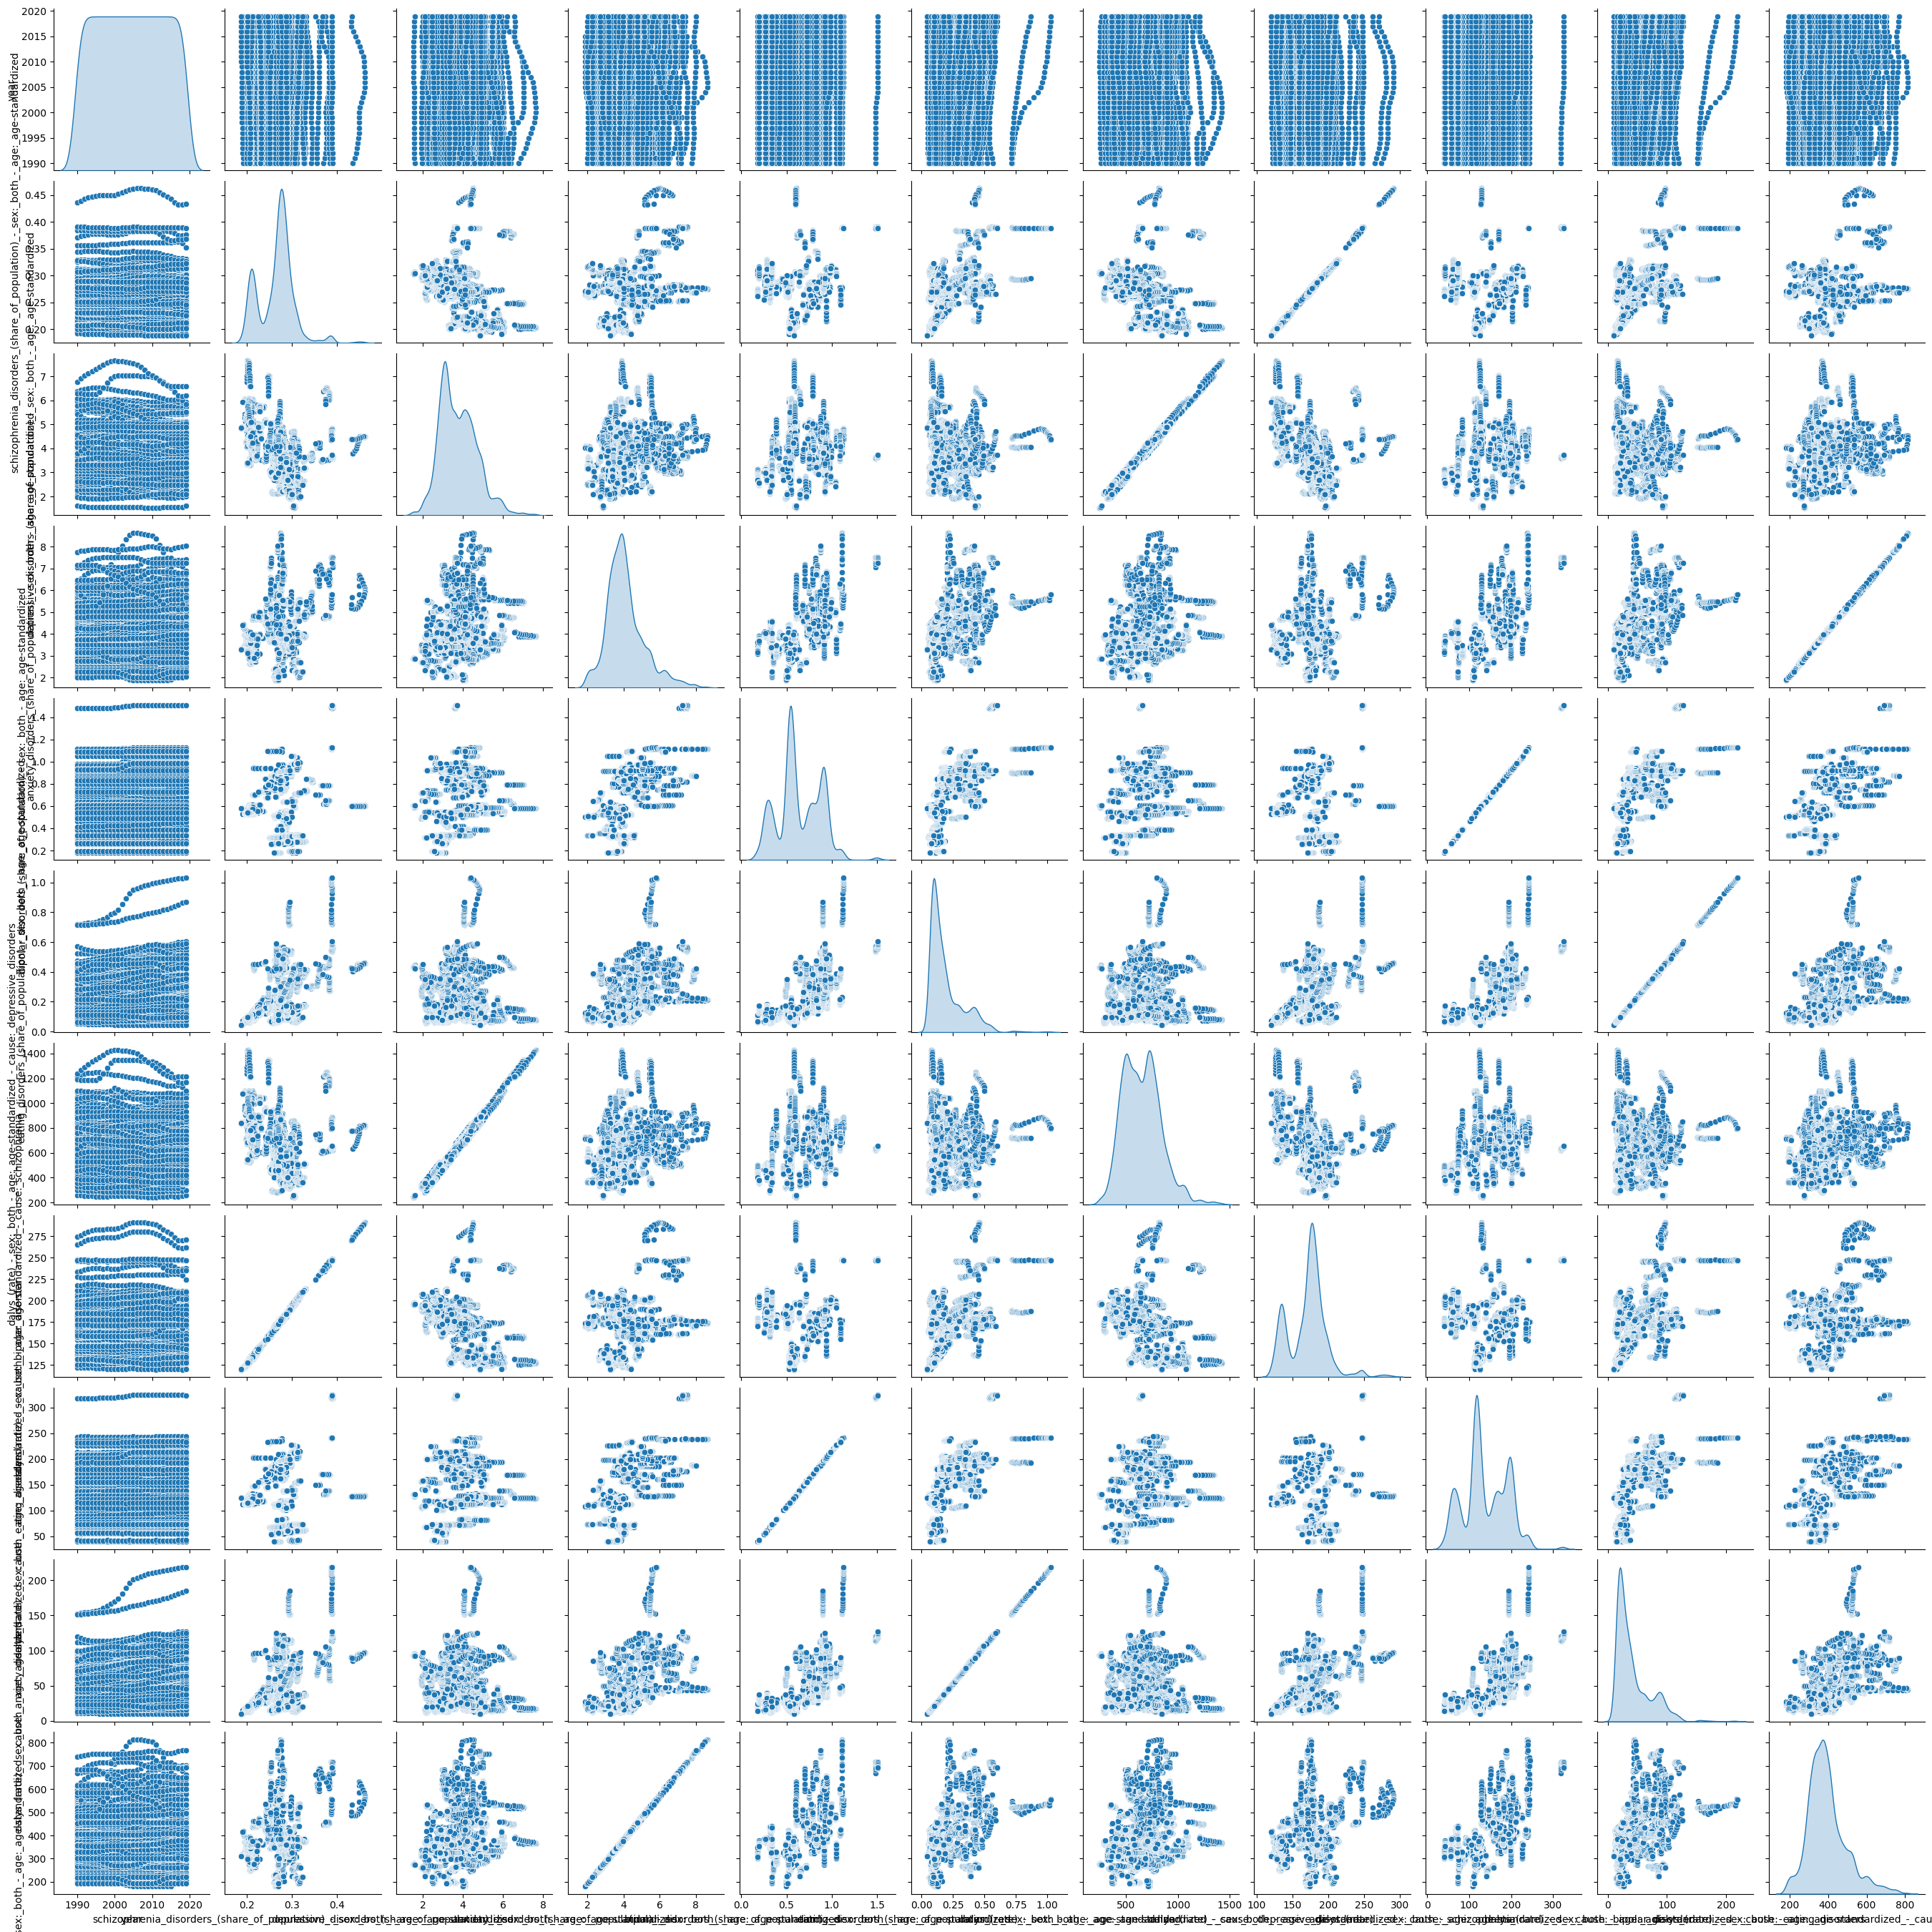

<Figure size 1000x800 with 0 Axes>

In [9]:
sns.pairplot(df_clean_data, diag_kind='kde')
plt.figure(figsize=(10, 8))
plt.suptitle('Relación entre Variables Numéricas', y=1.02)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4452\3859148577.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='porcentaje de esquizofrenia')


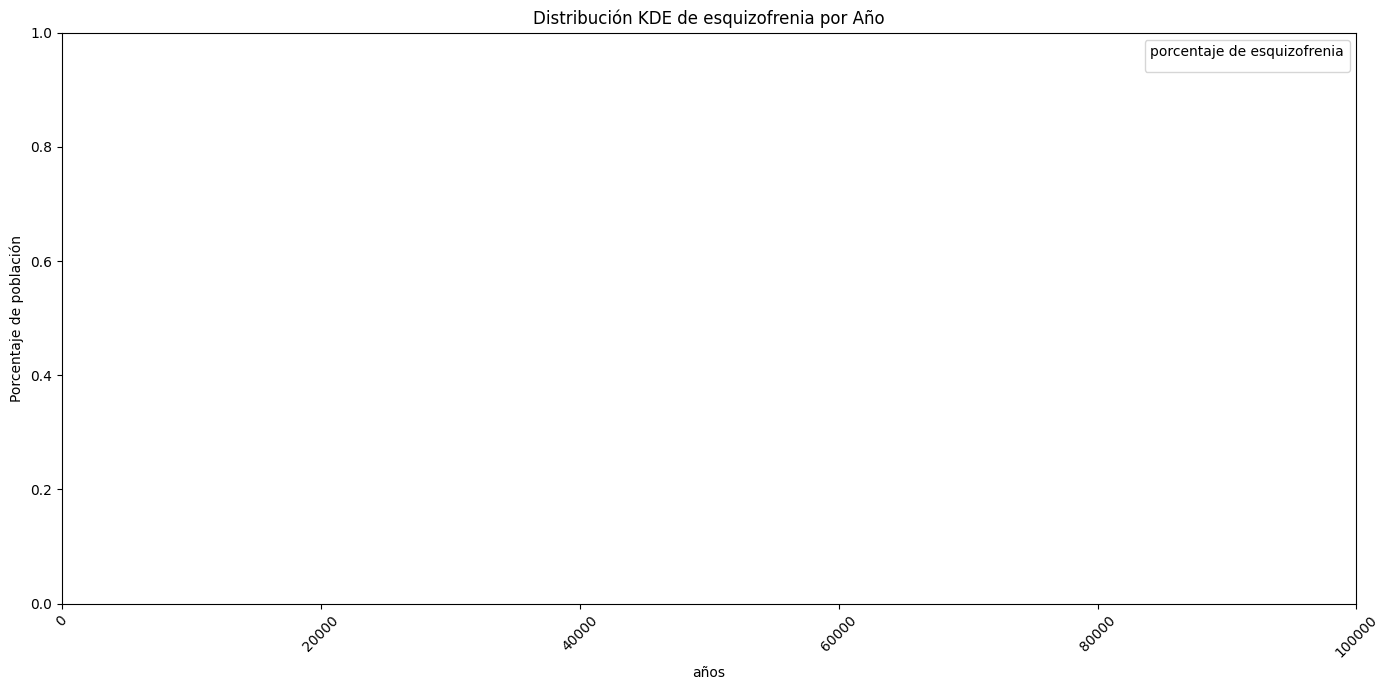

In [21]:
plt.figure(figsize=(14, 7))
# Obtener los años más comunes o últimos N años
years = sorted(df_clean_data['eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'].dropna().unique())[-6:]  # Últimos 6 años

# Graficar curvas KDE superpuestas
for year in years:
    subset = df_clean_data[df_clean_data['eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'] == year]
    if len(subset) > 1:
        sns.kdeplot(
            data=subset,
            x='year',
            fill=True,
            linewidth=2,
            label=int(year),
            alpha=0.6
        )


plt.title('Distribución KDE de esquizofrenia por Año')
plt.xlabel('años')
plt.ylabel('Porcentaje de población')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  # Quitar notación científica
plt.xlim(0, 100000)
plt.legend(title='porcentaje de esquizofrenia')
plt.tight_layout()
plt.show()


In [14]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109
Data columns (total 14 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   entity                                                                             7110 non-null   object 
 1   code                                                                               7110 non-null   object 
 2   year                                                                               7110 non-null   int64  
 3   schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized  6420 non-null   float64
 4   depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized     6420 non-null   float64
 5   anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized        6420 non-null   float

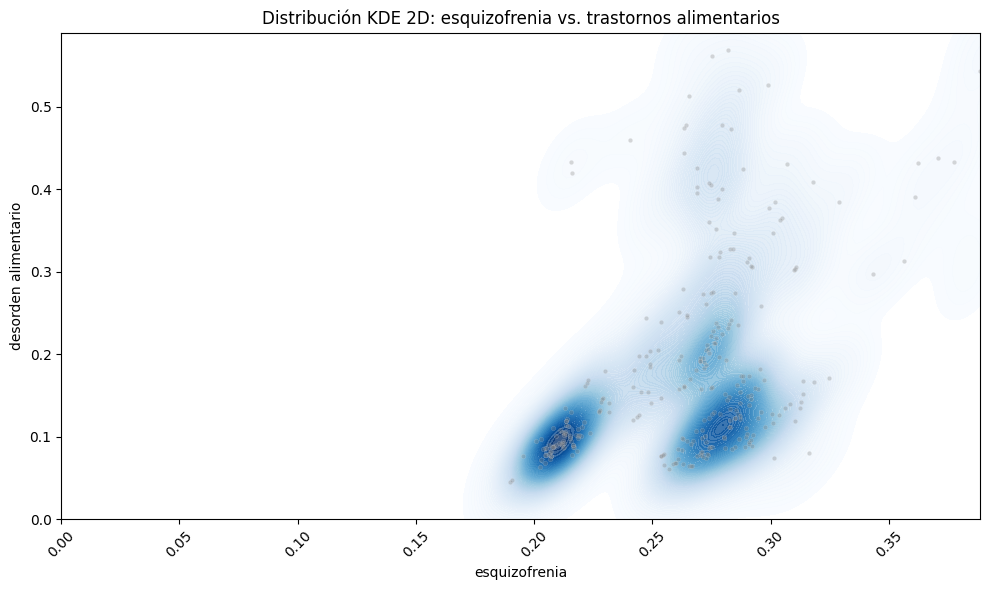

In [19]:
plt.figure(figsize=(10, 6))
# Asegurarse de que no haya NaNs
df_filtered = df_clean_data[['schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized', 'eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized']].dropna()

# KDE 2D con precio en eje X y milage en eje Y
sns.kdeplot(
    data=df_filtered,
    x='schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
    y='eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
    fill=True,
    cmap='Blues',
    thresh=0.01,
    levels=100,
    alpha=0.8
)

# Puntos reales (muestra aleatoria para que no sature)
sns.scatterplot(
    data=df_filtered.sample(300),
    x='schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
    y='eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
    color='gray',
    alpha=0.3,
    s=10
)

plt.title('Distribución KDE 2D: esquizofrenia vs. trastornos alimentarios')
plt.xlabel('esquizofrenia')
plt.ylabel('desorden alimentario')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='both')  # Quitar notación científica

# Limitar extremos para mejor visualización
plt.xlim(0, df_filtered['schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'].quantile(0.99))
plt.ylim(0, df_filtered['eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized'].quantile(0.99))

plt.tight_layout()
plt.show()

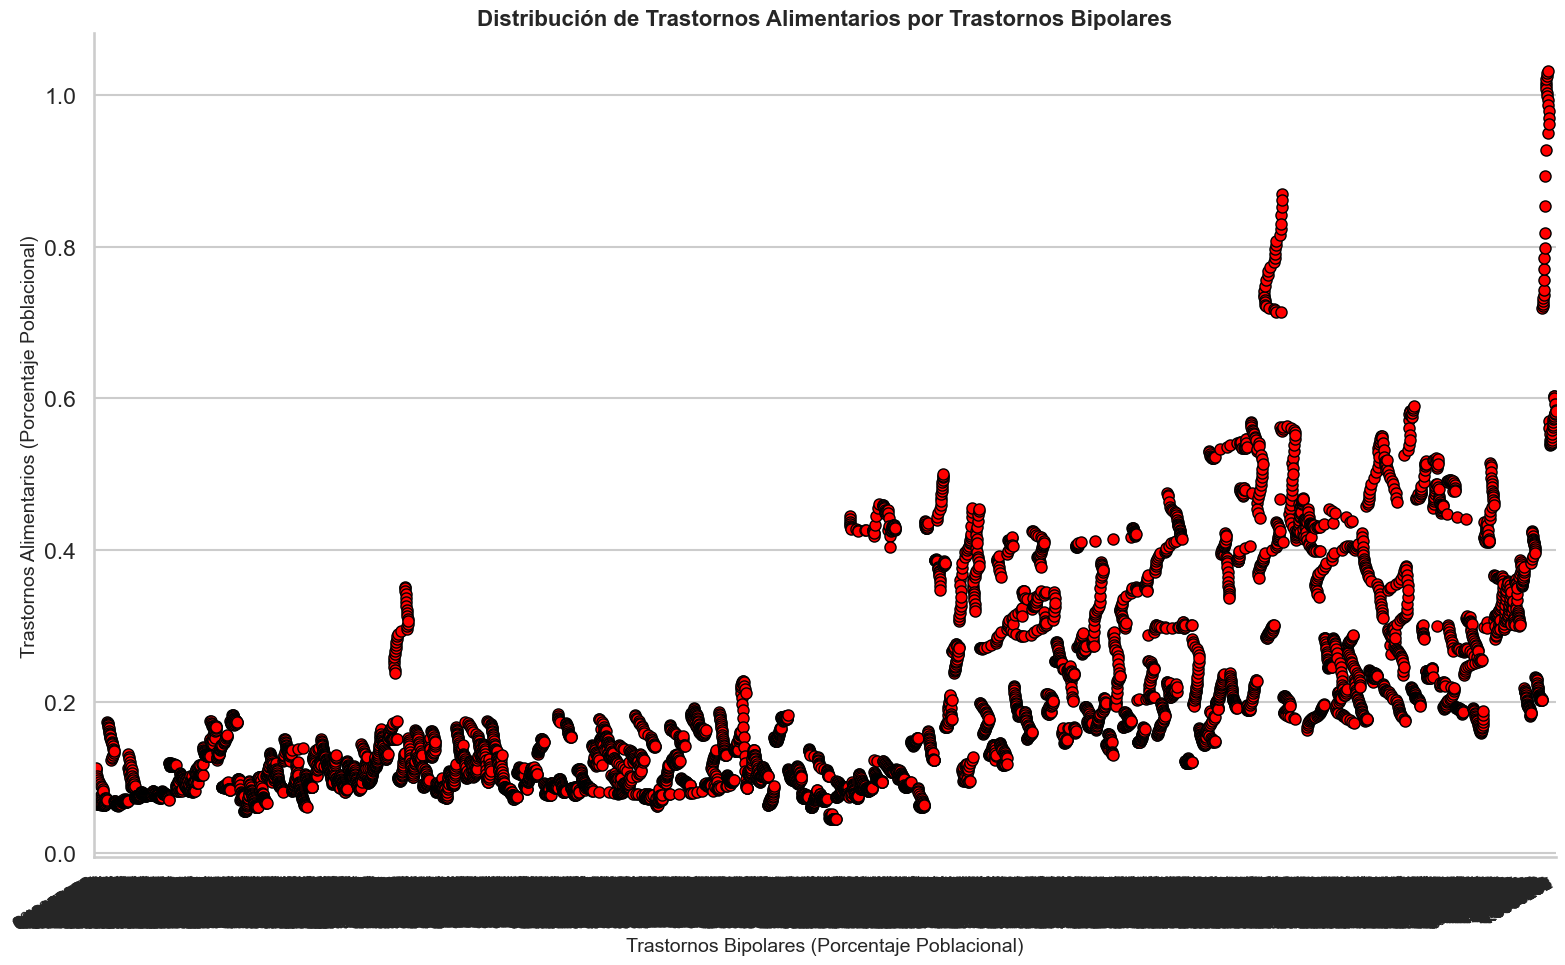

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid", context="talk", palette="coolwarm")

plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df_clean_data, 
    x='bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized', 
    y='eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8}
)

# Título y etiquetas
plt.title('Distribución de Trastornos Alimentarios por Trastornos Bipolares', fontsize=16, fontweight='bold', loc='center')
plt.xlabel('Trastornos Bipolares (Porcentaje Poblacional)', fontsize=14)
plt.ylabel('Trastornos Alimentarios (Porcentaje Poblacional)', fontsize=14)

# Rotación y ajuste de etiquetas
plt.xticks(rotation=30, ha='right', fontsize=12)

# Ajuste del layout
plt.tight_layout()

# Estilo despine para un look más limpio
sns.despine()

plt.show()


In [30]:
import plotly.express as px  # <-- Añade esta línea

df_clean_data.sort_values(by="dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders", inplace=True)
plt.figure(dpi=200)
fig = px.bar(
    df_clean_data, 
    x="dalys_(rate)_-_sex:_both_-_age:_age-standardized_-_cause:_depressive_disorders", 
    y="Entity", 
    orientation='h',
    color='Bipolar disorder'
)
fig.show()

ModuleNotFoundError: No module named 'plotly'